<a href="https://colab.research.google.com/github/valfadillah/Wholesale-analysis/blob/main/Wholesale_%26_Retail_orders_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Please load this library
import numpy as np
import pandas as pd
from datetime import date,datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read data
order_path = '/content/orders.csv'
product_supplier_path = '/content/product_supplier.csv'

df1 = pd.read_csv(order_path)
df2 = pd.read_csv(product_supplier_path)

In [ ]:
# changging time type
df1['Date Order was placed'] = pd.to_datetime(df1['Date Order was placed'])
df1['Delivery Date'] = pd.to_datetime(df1['Delivery Date'])

<ipython-input-5-a3fc52816cb1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date Order was placed'] = pd.to_datetime(df1['Date Order was placed'])
<ipython-input-5-a3fc52816cb1>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Delivery Date'] = pd.to_datetime(df1['Delivery Date'])


In [ ]:
# Transforming customer status
df1['Customer Status'].value_counts()

df1['Customer Status'] = df1['Customer Status'].str.lower().str.capitalize()

# convert into string
df1['Customer Status'] = df1['Customer Status'].astype(str)


In [ ]:
# Creating new column for Retail price
df1['Retail Price'] = df1['Total Retail Price for This Order'] / df1['Quantity Ordered']

# cheking is na or null
df1.isna().sum()
df1.isnull().sum()

,0
Customer ID,0
Customer Status,0
Date Order was placed,0
Delivery Date,0
Order ID,0
Product ID,0
Quantity Ordered,0
Total Retail Price for This Order,0
Cost Price Per Unit,0
Retail Price,0


In [ ]:
# merge
df = pd.merge(df1, df2, on='Product ID', how='inner')

# cheking NaN or Null
df.isna().sum()
df.isna().sum()

'''All data doesnt have any NaN or Null.
we can use df as basic data frame to proccess'''
df.head()

,Customer ID,Customer Status,Date Order was placed,Delivery Date,Order ID,Product ID,Quantity Ordered,Total Retail Price for This Order,Cost Price Per Unit,Retail Price,Product Line,Product Category,Product Group,Product Name,Supplier Country,Supplier Name,Supplier ID
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,46.3,Clothes & Shoes,Clothes,Tracker Clothes,Casual V-Neck Men's Sweatshirt,US,3Top Sports,2963
1,7574,Silver,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,21.7,Children,Children Sports,Tracker Kid's Clothes,Children's Tee,US,3Top Sports,2963
2,28861,Gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,1.7,Outdoors,Outdoors,Outdoor Gear,Plate Picnic Deep,GB,Prime Sports Ltd,316
3,43796,Gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,47.9,Clothes & Shoes,Clothes,Eclipse Clothing,Woman's Woven Pants L,US,Eclipse Inc,1303
4,54673,Gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,36.9,Clothes & Shoes,Shoes,Shoes,Soft Gel Court Men's Indoor Shoes,US,Pro Sportswear Inc,1747


<ipython-input-9-db35a4b9e2fc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


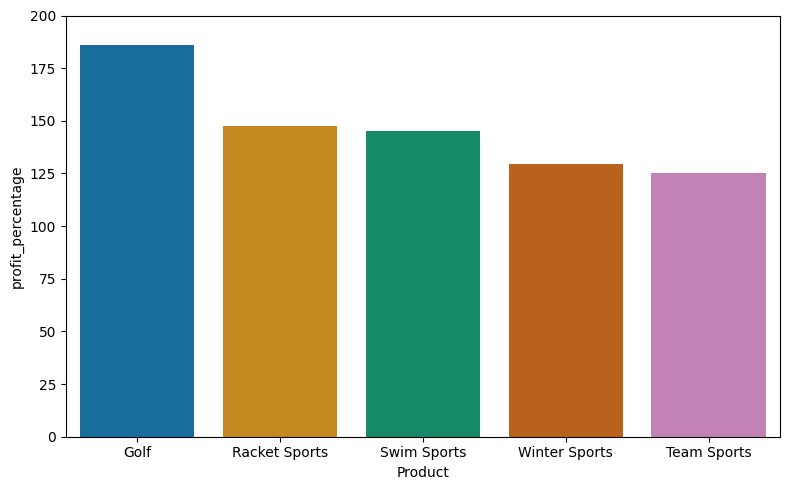

In [ ]:
# Q1
# calculating the profit percentage
df['percentage profit'] = ((df['Retail Price'] - df['Cost Price Per Unit']) / df['Cost Price Per Unit']) * 100

# group by category
top_categories = df.groupby('Product Category')['percentage profit'].mean().reset_index()

# sorting top 5 for visualization
top_5_categories = top_categories.sort_values(by='percentage profit', ascending=False).head(5)

# Ploting
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_5_categories,
    x='Product Category',
    y='percentage profit',
    palette='colorblind'
)
plt.xlabel('Product')
plt.ylabel('profit_percentage')
plt.ylim(0, 200)
plt.tight_layout()
plt.show()


The bar chart presents the average profit percentage across all different product categories. It is clear that golf products yield the highest profit percentage, standing out significantly at just below 190%. This indicates that, compared to the cost, golf products generate more than 1.8 times in profit, making them the most lucrative category among the others. Meanwhile, racket sports and swim sports follow with slightly lower profit percentages, both hovering around the 145% mark.

On the lower end of the chart, winter sports and team sports generate relatively smaller profit margins, approximately 130% and 125% respectively. Although all categories remain profitable, the noticeable gap between golf and the others highlights an opportunity to focus more on golf-related items for higher returns. This chart provides useful insight for business decision-making, especially in prioritizing products with better profitability.

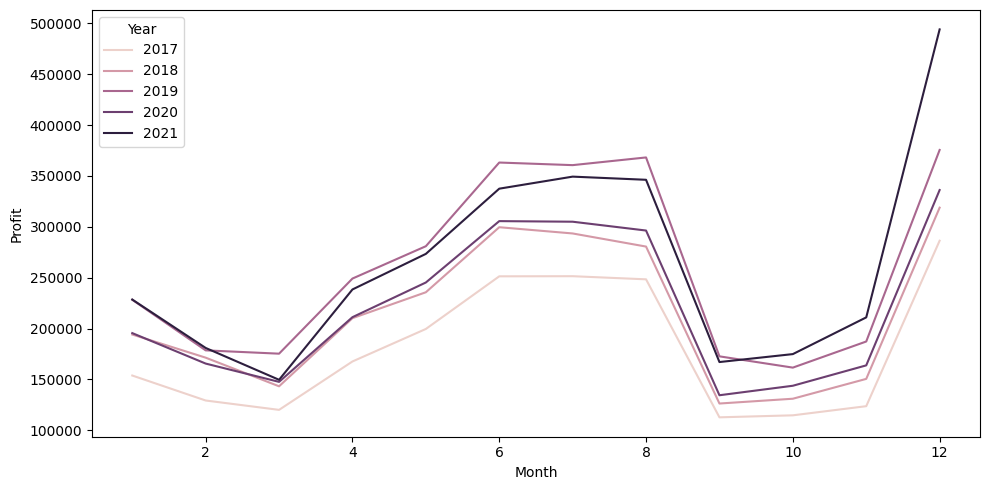

In [ ]:
# Q2
df['profit'] = (df['Retail Price'] - df['Cost Price Per Unit']) * df['Quantity Ordered']

# extract year and month
df ['Year'] = pd.to_datetime(df['Date Order was placed']).dt.year
df ['Month'] = pd.to_datetime(df['Date Order was placed']).dt.month

# summing profit each month and year
profit_graph = df.groupby(['Year', 'Month']) ['profit'].sum().reset_index()

# ploting
plt.figure(figsize=(10,5))
sns.lineplot(
    data=profit_graph,
    x='Month',
    y='profit',
    hue='Year'
)
sns.color_palette("mako", as_cmap=True)
plt.xlabel('Month')
plt.ylabel('Profit')

plt.legend(title='Year', loc='upper left')
plt.tight_layout()
plt.show()


The line chart illustrates the monthly profit trends from 2017 to 2021. It is evident that profits generally follow a similar seasonal pattern across all years. Profits tend to be lower at the beginning of the year, gradually rising from March through August. A noticeable dip consistently occurs in September and October before profits recover sharply in November and reach their peak in December. Among all years, 2021 shows the highest overall profitability, especially in the last quarter, indicating significant business growth or a successful sales strategy during that period.

This recurring trend suggests a strong seasonal influence on profit, possibly due to increased customer spending during mid and end-of-year periods, such as summer and holidays. The consistent spike in December implies that end-of-year promotions or holiday shopping play a vital role in boosting revenue. Businesses could use this insight to optimize inventory and marketing efforts during high-performing months to maximize overall profitability.

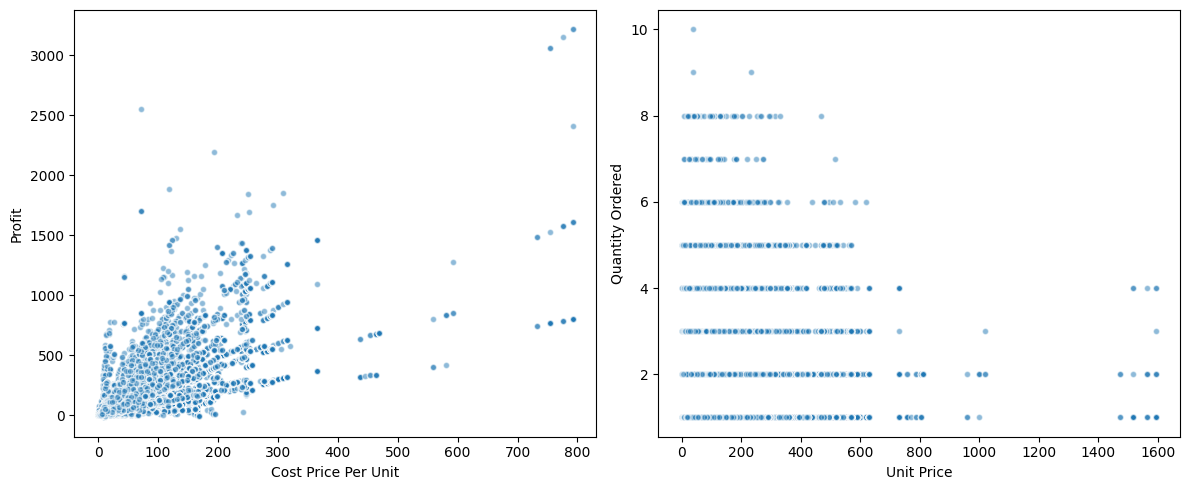

In [ ]:
# Q3
plt.figure(figsize=(12, 5))

# Left plot
plt.subplot(1, 2, 1)
plt.scatter(df['Cost Price Per Unit'],df['profit'],
            alpha=0.5, s=20, edgecolors='w'
            )
plt.xlabel('Cost Price Per Unit')
plt.ylabel('Profit')

# Right plot
plt.subplot(1, 2, 2)
plt.scatter(df['Retail Price'], df['Quantity Ordered'],
            alpha=0.5, s=20, edgecolors='w'
            )
plt.xlabel('Unit Price')
plt.ylabel('Quantity Ordered')

plt.tight_layout()
plt.show()


**Left Visualization: Profit vs. Cost Price Per Unit**

The scatter plot on the left illustrates the relationship between the cost price per unit and the profit generated. It shows a clear upward trend—products with a higher cost price tend to generate greater profits. Most data points are densely packed in the lower cost range (under 300), suggesting that the majority of products have relatively low production costs but still contribute significantly to total profit. A few outliers with high cost prices and exceptionally high profits suggest the presence of premium or high-margin items.

This pattern indicates that while lower-cost products dominate in volume, high-cost items can be strategically important for driving large individual profits. Businesses could use this insight to balance their product mix by including more high-cost, high-margin items alongside fast-moving, lower-cost goods. Doing so may improve profitability without relying solely on high-volume sales.

**Right Visualization: Quantity Ordered vs. Unit Price**

The scatter plot on the right displays the relationship between unit price and quantity ordered. There is a noticeable trend where lower-priced products tend to be ordered in higher quantities, while higher-priced products are ordered less frequently. Most of the data points are concentrated in the price range below 400, showing customer preference for more affordable products. As unit prices increase beyond 800, the number of units ordered drops significantly, reflecting price sensitivity in customer purchasing behavior.

This pattern reveals that pricing strategy plays a vital role in influencing order volume. Products with lower unit prices are more accessible and likely contribute to higher sales volume, whereas high-priced products might require targeted marketing or added value to encourage sales. Understanding this relationship can help businesses set optimal price points that balance customer demand and revenue potential.

<ipython-input-12-2118bd44b574>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


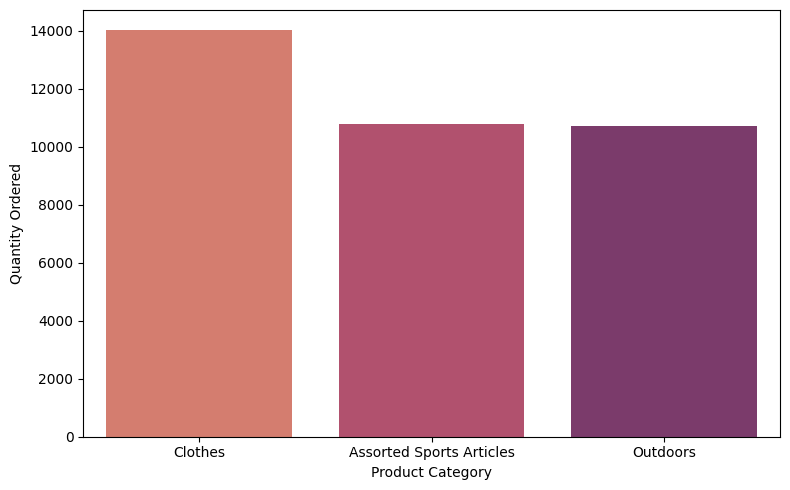

In [ ]:
# Q4
latest_year = df['Year'].max()

# filtering data that only appear in latest year
fav_product = df[df['Year'] == latest_year]

# grouping
fav_product = fav_product.groupby('Product Category')['Quantity Ordered'].sum().reset_index()

top_3_product = fav_product.sort_values(by='Quantity Ordered', ascending=False).head(3)

# plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_3_product,
    x='Product Category',
    y='Quantity Ordered',
    palette='flare'
)
plt.xlabel('Product Category')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()

The bar chart illustrates the total quantity ordered for top three product categories: Clothes, Assorted Sports Articles, and Outdoors. Among these, Clothes lead significantly with the highest quantity ordered, reaching approximately 14,000 units. This figure is notably higher compared to the other two categories, indicating a strong consumer demand for apparel products, potentially due to their broad usability and high frequency of purchase.

In comparison, both Assorted Sports Articles and Outdoors categories show nearly equal quantities ordered, each slightly above 10,000 units. This suggests a moderate and consistent interest in these categories, likely reflecting seasonal or hobby-based purchasing behavior. From a business perspective, the dominance of Clothes in order volume presents an opportunity for targeted marketing and inventory prioritization, while the stability in the other categories supports maintaining a balanced stock strategy to meet steady demand.

In [ ]:
# Q5
longest_delivery = df[df['Year'] == latest_year]

longest_delivery['order_to_delivery_length'] = (longest_delivery['Delivery Date'] - longest_delivery['Date Order was placed']).dt.days

# result
result = longest_delivery.groupby('Month')['order_to_delivery_length'].agg(
    order_to_delivery_length ='median',
    the_longest_order_to_delivery_lenght='max'
).reset_index()

result

<ipython-input-13-92bd13129059>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longest_delivery['order_to_delivery_length'] = (longest_delivery['Delivery Date'] - longest_delivery['Date Order was placed']).dt.days


,Month,order_to_delivery_length,the_longest_order_to_delivery_lenght
0,1,0.0,20
1,2,0.0,20
2,3,0.0,23
3,4,0.0,19
4,5,0.0,18
5,6,0.0,16
6,7,0.0,21
7,8,0.0,17
8,9,0.0,21
9,10,0.0,22


The table displays monthly data regarding order-to-delivery performance, specifically highlighting both the average and the longest delivery times in days. It is evident that the `order_to_delivery_length` remains consistently at 0.0 across all months, which could indicate a data collection issue or a processing error. Despite this anomaly, the column `the_longest_order_to_delivery_length` shows meaningful variation, suggesting that individual cases of extended delivery times were successfully recorded.

Throughout the year, the longest delivery times ranged between 16 and 25 days. The shortest maximum delay occurred in June (16 days), while the longest was observed in December (25 days). This seasonal pattern implies that delivery delays tend to increase towards the end of the year, likely due to holiday-related demand and logistical congestion. The presence of long delivery times despite an average of zero underscores the importance of addressing data quality and further investigating outlier cases to improve overall delivery reliability.

In [ ]:
# Q6A
# transaction filtered for last 3 month
top_customer = longest_delivery[longest_delivery['Month'] > 9]

top_customer = (
    top_customer.groupby('Customer ID')
    .size()
    .reset_index(name='Order Count')
)

# buyer who bought 3 times in last 3 months filtering
top_customer = top_customer[top_customer['Order Count'] > 3]['Customer ID']

top_customer

,Customer ID
109,863
110,870
146,1244
147,1263
161,1342
...,...
9265,88563
9577,91511
9663,92311
9734,92969


The data presented identifies 103 unique customer IDs categorized as *active loyal customers*. These individuals have each made more than three purchases within the last three months of the most recent year, and notably, each transaction involved different products. This pattern of frequent and varied purchasing highlights a strong engagement level, suggesting that these customers not only trust the brand but also explore a wide range of its offerings. Their continued patronage plays a significant role in sustaining recurring revenue and enhancing product visibility across categories.

Understanding the behavior and preferences of these loyal customers is essential for developing effective customer retention strategies. Given their purchasing diversity and consistency, the company can benefit from implementing personalized marketing campaigns, exclusive loyalty rewards, or early access to new product lines. Such initiatives would likely increase customer satisfaction and further cement brand loyalty. Moreover, these customers represent high-value profiles that could serve as brand advocates, influencing others through positive word-of-mouth and repeat engagement.

<ipython-input-15-a0ce3eb62c05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_orders['Customer Status'] = repeat_orders['Customer Status'].map(mapping_status)
<ipython-input-15-a0ce3eb62c05>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (


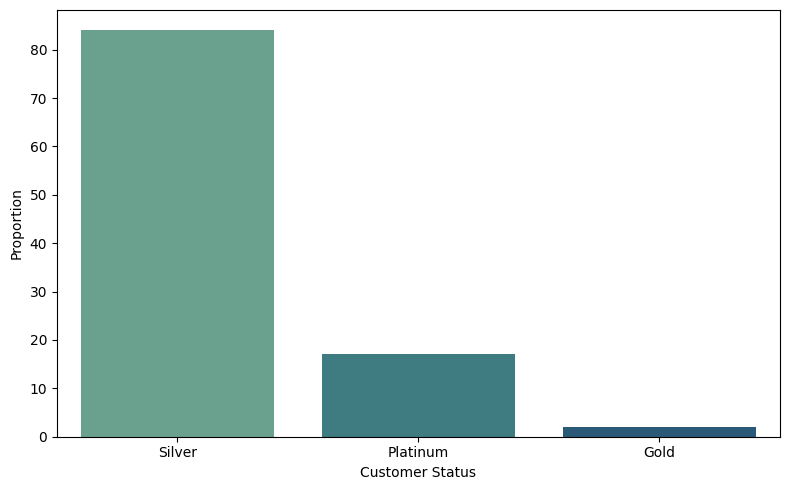

In [ ]:
# Q6B
repeat_orders = longest_delivery[longest_delivery['Customer ID'].isin(top_customer)]

# Mapping customer status
mapping_status =  {'Gold': 1, 'Silver': 2, 'Platinum': 3}
repeat_orders['Customer Status'] = repeat_orders['Customer Status'].map(mapping_status)

# pick the highest level
max_level = repeat_orders.groupby('Customer ID')['Customer Status'].max().reset_index()
remapping_status = {1: 'Gold', 2: 'Silver', 3: 'Platinum'}
max_level ['Customer Status'] = max_level['Customer Status'].map(remapping_status)

# proportion calculated
proportion = max_level['Customer Status'].value_counts().reset_index()
proportion.columns= ['Customer Status', 'Proportion']

# Plot
plt.figure(figsize=(8,5))
sns.barplot (
    data = proportion
    , x='Customer Status'
    , y='Proportion'
    , palette= 'crest'
)
plt.xlabel('Customer Status')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

The bar chart above presents the distribution of customer status among the 103 identified active loyal customers, with classification based on three tiers: Silver, Gold, and Platinum. It is evident that the majority of these loyal customers fall within the Silver category, accounting for more than 80% of the total. Platinum customers make up a smaller segment, representing approximately 17%, while Gold customers are notably underrepresented, comprising just a minimal fraction. Since only the highest status is counted for each customer (with Gold = 1, Silver = 2, and Platinum = 3), the Silver and Platinum categories dominate the final calculation.

This distribution indicates that most loyal customers are in the early or mid-tier levels of engagement rather than at the top-tier Gold status. Given that the Silver group constitutes the bulk of the base, there is a significant opportunity to nurture and elevate their status through targeted loyalty programs, incentives, and personalized services. Meanwhile, Platinum members, though fewer in number, demonstrate the highest value and should be prioritized for retention strategies. The minimal representation of Gold status suggests either a transition point in the loyalty hierarchy or the need to revisit and optimize the benefits and criteria associated with that tier.